**TRABAJO FINAL 4**

En este trabajo buscaremos conocer si es posible predecir la cantidad de publicaciones de la empresa Properati en un periodo de tiempo determinado.
Nuestro objetivo principal sera el desarrollo de un modelo de prediccion que nos ayude a anticiparnos y detectar estacionalidad.

En una primera instancia, se realizara un analisis general de los datos y filtrado de los mismos.

In [3]:
# Importamos las librerias que utilizaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [4]:
# Leemos nuestro dataset
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [5]:
#Tamaño del dataset
data.shape

(146660, 19)

- **Filtrado y limpieza de datos:**

In [6]:
#Eliminamos outliers utilizando la metodologia de quantiles

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
data = data[~((data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)).any(axis=1)]
data.shape

(99557, 19)

In [7]:
# Filtramos por tipo de propiedad
data=data[data.property_type.isin(["PH","Casa","Departamento"]) ]
data.shape

(98417, 19)

In [8]:
# Visualizamos que tipo de variable es created_on
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98417 entries, 1 to 146654
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_date       98417 non-null  object 
 1   end_date         98417 non-null  object 
 2   created_on       98417 non-null  object 
 3   lat              90806 non-null  float64
 4   lon              90777 non-null  float64
 5   l1               98417 non-null  object 
 6   l2               98417 non-null  object 
 7   l3               98417 non-null  object 
 8   rooms            98417 non-null  float64
 9   bedrooms         98417 non-null  float64
 10  bathrooms        95544 non-null  float64
 11  surface_total    86693 non-null  float64
 12  surface_covered  86364 non-null  float64
 13  price            98417 non-null  float64
 14  currency         98417 non-null  object 
 15  title            98417 non-null  object 
 16  description      98417 non-null  object 
 17  property_ty

In [9]:
# Creamos una nueva columna llamada fecha_creacion con formato datetime

data['fecha_creacion'] = pd.to_datetime(data['created_on'])
data.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type,fecha_creacion
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,2019-10-17
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,2019-10-17
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,2019-10-17
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,2019-10-17
6,2019-10-17,2019-10-31,2019-10-17,-34.600988,-58.433061,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Muy lindo PH, con terraza propia, 96m2! por es...",PH,Venta,2019-10-17


In [10]:
# Eliminamos las columnas que no vamos a utilizar para el analisis
data=data[['fecha_creacion',"price","property_type", "created_on"]]
data.head()

,fecha_creacion,price,property_type,created_on
1,2019-10-17,159000.0,PH,2019-10-17
2,2019-10-17,125000.0,PH,2019-10-17
3,2019-10-17,295000.0,PH,2019-10-17
5,2019-10-17,150000.0,PH,2019-10-17
6,2019-10-17,159500.0,PH,2019-10-17


In [11]:
# Visualizamos minimos y maximos correspondientes a cada columna

print(data.min())
print("")
print(data.max())

fecha_creacion    2019-01-01 00:00:00
price                            6000
property_type                    Casa
created_on                 2019-01-01
dtype: object

fecha_creacion    2020-01-25 00:00:00
price                          496000
property_type                      PH
created_on                 2020-01-25
dtype: object


Podemos ver que las publicaciones van del 01/01/2019 al 25/01/2020. Esta es la franja temporal de nuestra serie de tiempo.

In [12]:
# Reseteamos el indice
data.reset_index(drop=True, inplace= True)
data.head()

,fecha_creacion,price,property_type,created_on
0,2019-10-17,159000.0,PH,2019-10-17
1,2019-10-17,125000.0,PH,2019-10-17
2,2019-10-17,295000.0,PH,2019-10-17
3,2019-10-17,150000.0,PH,2019-10-17
4,2019-10-17,159500.0,PH,2019-10-17


In [13]:
# Visualizamos la cantidad de publicaciones por año
data.groupby(data["fecha_creacion"].dt.year).count()

,fecha_creacion,price,property_type,created_on
fecha_creacion,,,,
2019,88774,88774,88774,88774
2020,9643,9643,9643,9643


En el año 2019 encontramos 88.336 publicaciones, mientras que en 2020: 9.587.

Luego agrupamos la cantidad de publicaciones realizadas por fecha y creamos una nueva variables llamada 'cant_publicaciones'

In [14]:
# Agrupamos publicaciones
df=data.groupby("fecha_creacion")["created_on"].size().reset_index()
df= df.rename(columns={"created_on": "cant_publicaciones"})
df

,fecha_creacion,cant_publicaciones
0,2019-01-01,38
1,2019-01-02,69
2,2019-01-03,123
3,2019-01-04,190
4,2019-01-05,108
...,...,...
360,2020-01-21,244
361,2020-01-22,320
362,2020-01-23,1261
363,2020-01-24,1392


A continuacion graficamos la cantidad de publicaciones ubicadas en Capital Federal

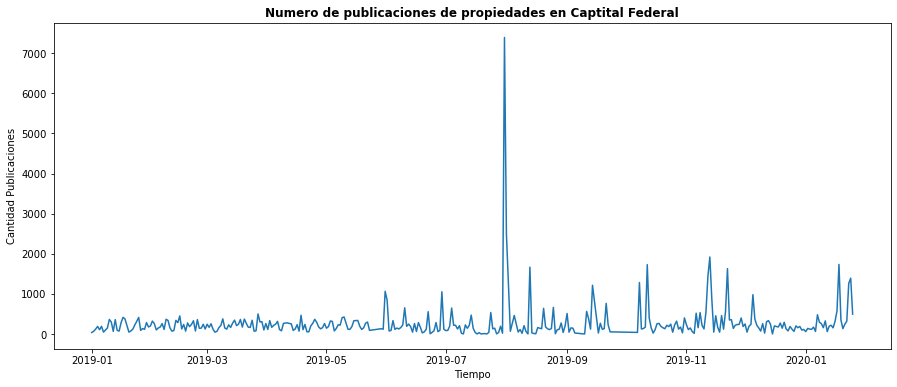

In [16]:
plt.figure(figsize = (15,6))
plt.plot(df.fecha_creacion,df.cant_publicaciones)
plt.title ('Numero de publicaciones de propiedades en Captital Federal',fontweight='black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad Publicaciones')
plt.show()

Se puede visualizar claramente un pico de pulicaciones entre Julio del 2019 y Septiembre de ese mismo año, sin embargo este no significa estacionalidad o tendencia.

Para una mejor visualizacion de los datos, haremos un resampleo diario.

In [17]:
diario = df.resample("D", on = 'fecha_creacion').mean()
print(diario.shape)
diario.head()

(390, 1)


,cant_publicaciones
fecha_creacion,
2019-01-01,38.0
2019-01-02,69.0
2019-01-03,123.0
2019-01-04,190.0
2019-01-05,108.0


In [18]:
# Visualizamos datos nulos
diario.isnull().sum()

cant_publicaciones    25
dtype: int64

Graficamos nuevamente:

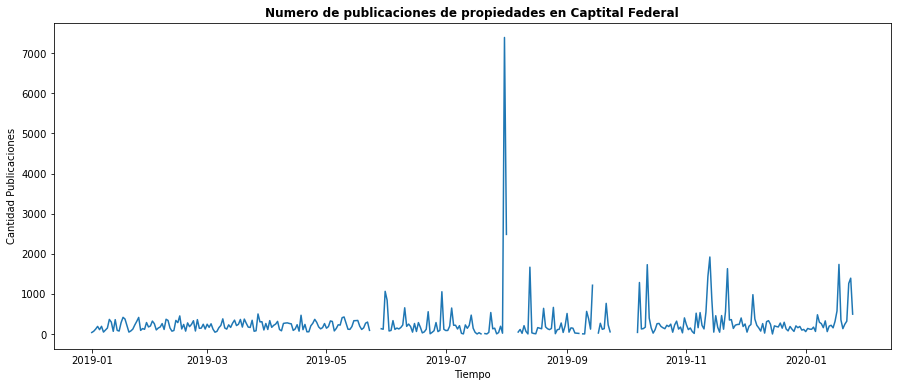

In [19]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cant_publicaciones)
plt.title ('Numero de publicaciones de propiedades en Captital Federal',fontweight='black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad Publicaciones')

plt.show()

Como podemos ver en el grafico anterior, el mismo no es continuo y esto se debe a la presencia de valores faltantes.
A continuacion resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable.

- **Imputacion de valores faltantes:**

In [20]:
#Reemplazamos valores nulos por la media
diario.cant_publicaciones[diario.cant_publicaciones > 2000] = np.nan 

In [21]:
diario= diario.interpolate() 
diario.head()

,cant_publicaciones
fecha_creacion,
2019-01-01,38.0
2019-01-02,69.0
2019-01-03,123.0
2019-01-04,190.0
2019-01-05,108.0


In [22]:
# Validamos que realmente no hayan mas valores nulos
diario.isnull().sum()

cant_publicaciones    0
dtype: int64

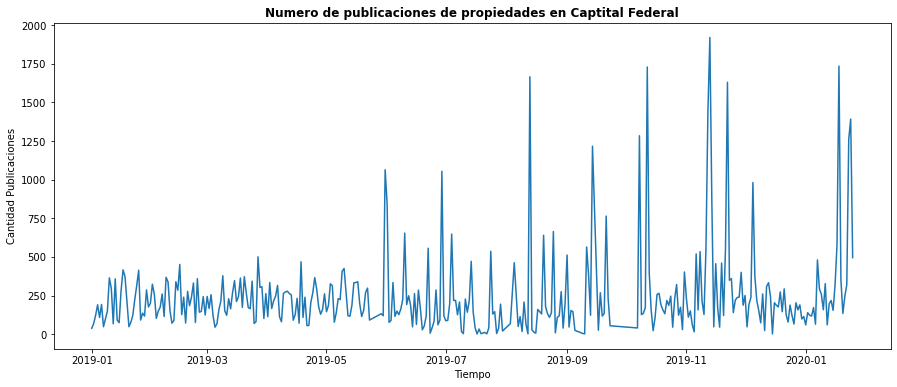

In [23]:
# Graficamos con el reemplazo de los valores faltantes
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cant_publicaciones)
plt.title ('Numero de publicaciones de propiedades en Captital Federal',fontweight='black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad Publicaciones')

plt.show()

Una vez realizado el grafico, 

**MEDIA MOVIL**

Obtenemos los componentes de una Serie de Tiempo es un tema amplio y, como siempre, depende del problema en el que estás trabajando. El método más sencillo se conoce como media móvil. Consiste en tomar una ventana de tiempo suficientemente grande y promediar la serie sobre esa ventana. De esta forma, obtienes la tendencia.

El proceso de tomar una ventana, trasladarlo a lo largo de una serie de tiempo y hacer alguna operación en esa ventana se conoce como 'Rolling Window'.

In [24]:
# Media movil

ventana=int(7)
semanal_promedio_tendencia= diario.cant_publicaciones.rolling(window=ventana , center = True).mean()
semanal_promedio_tendencia[50:]


fecha_creacion
2019-02-20    202.571429
2019-02-21    219.714286
2019-02-22    229.714286
2019-02-23    211.142857
2019-02-24    219.571429
                 ...    
2020-01-21    776.857143
2020-01-22    599.714286
2020-01-23           NaN
2020-01-24           NaN
2020-01-25           NaN
Freq: D, Name: cant_publicaciones, Length: 340, dtype: float64

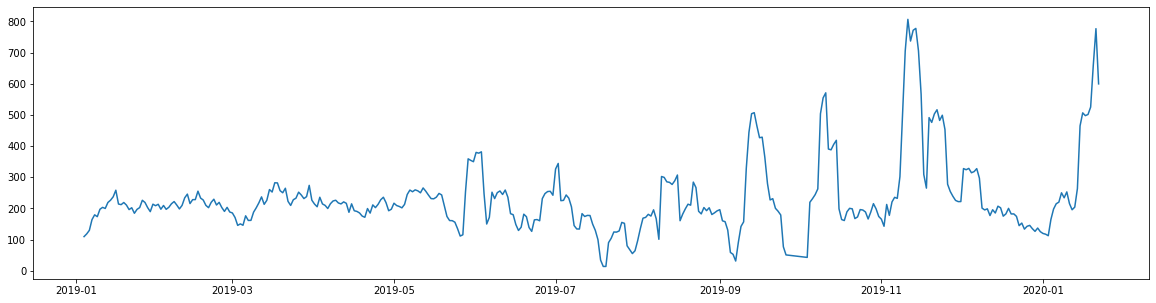

In [25]:
# Graficamos el promedio de publicaciones semanal 
plt.figure(figsize=(20,5))
plt.plot(semanal_promedio_tendencia)

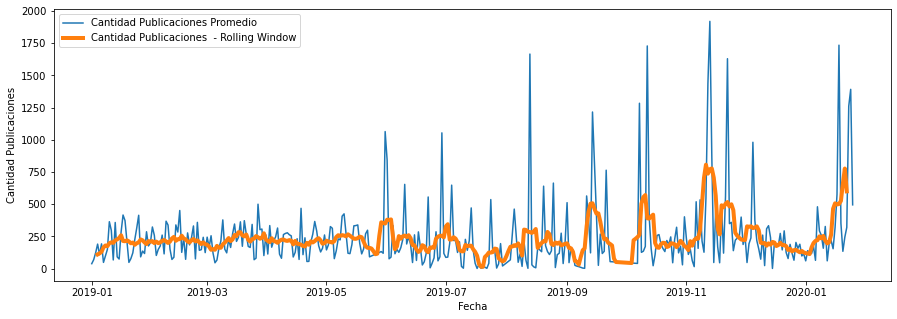

In [26]:
# Graficamos publicaciones diarias promedio y cantidad de publicaciones utilizando Rolling Window
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cant_publicaciones, label = 'Cantidad Publicaciones Promedio')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Cantidad Publicaciones  - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Publicaciones')
plt.legend()
plt.show()

Analizando los graficos anteriormente presentados, podemos afirmar que existe una tendencia creciente en la cantidad de publicaciones realizadas.

**TENDENCIA LINEAL:**

Este método consiste simplemente en ajustar una regresión lineal a la serie, sin embargo la validez de este método es muy limitada.

Para comenzar, debemos ajustar las fechas a un formato numerico.

In [27]:
diario["fechas_numeros"]= diario.index.map(datetime.datetime.toordinal)
diario.head()

,cant_publicaciones,fechas_numeros
fecha_creacion,,
2019-01-01,38.0,737060
2019-01-02,69.0,737061
2019-01-03,123.0,737062
2019-01-04,190.0,737063
2019-01-05,108.0,737064


Generamos un modelo de regresion lineal:

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario.fechas_numeros.values.reshape(-1, 1), diario.cant_publicaciones)

LinearRegression()

Graficamos la cantiad de publicaciones promedio en comparacion con Rolling Window y ajutamos el modelo lineal

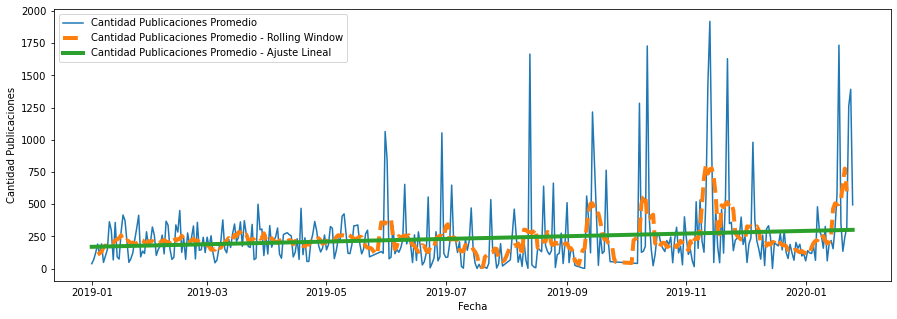

In [29]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diario.cant_publicaciones, label = 'Cantidad Publicaciones Promedio')
plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad Publicaciones Promedio - Rolling Window')
plt.plot(diario.index, lr.predict(diario.fechas_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad Publicaciones Promedio - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantidad Publicaciones')
plt.legend()
plt.show()

Al observar el grafico reafirmamos las conclusiones obtenidas con el metodo anterior, la cantidad de publicaciones presenta una tendencia creciente y que mantiene una estacionalidad constante.

**AUTOCORRELACION**

La correlación es una cuantificación de la relación entre el comportamiento de dos variables. La misma puede ser Positiva (ambas crecen o decrecen a la vez y son valores cercanos a 1), Negativa (si una variable crece la otra decrece y viceversa, valores cercanos a -1) o que no exista correlacion entre ellas (valores cercanos a 0).
En series de tiempo, es la relacion entre variables a medida que pasa el tiempo. 

La *autocorrelacion* es la correlacion de una variable consigo misma, tiendo en cuenta los *lags* para que el analisis tenga sentido, es decir, esa variable pero desfasada en el tiempo. Para este analisis utilizaremos la librería `statsmodel`.

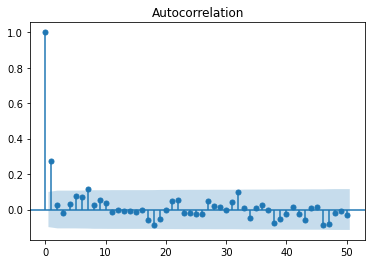

In [30]:
# Graficamos la correlacion de la variable cantidad de publicaciones consigo misma
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(diario.cant_publicaciones, lags = 50)
plt.show()

Como podemos visualizar en el grafico, la correlacion es menor a 0.2, como este valor es cercano a 0 podemos decir que no existe correlacion.

**DESCOMPONER LA SERIE DE TIEMPO**

Esta tecnica se basa en descomponer la serie de tiempo en: *estacionalidad*, *tendencia* y *factores residuales*

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(diario.cant_publicaciones, model='aditive')

A continuacion graficaremos las 3 variables de la serie de tiempo para poder analizarlas de manera autonoma, sin embargo nos concentraremos en tendencia y estacionalidad.

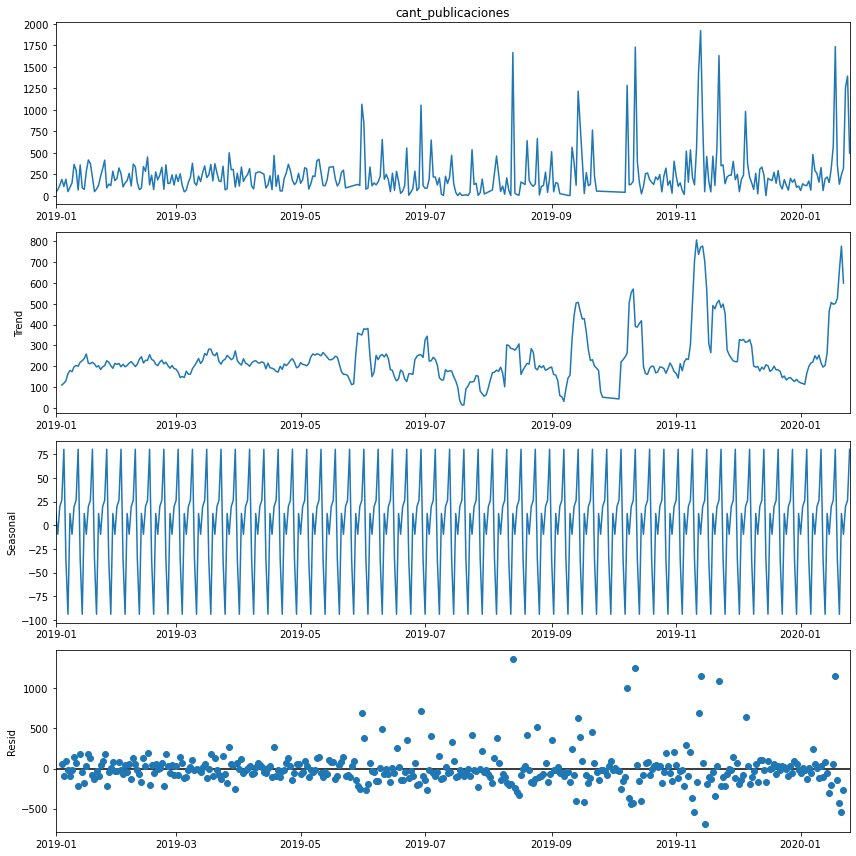

In [32]:
plt.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

En el segundo grafico, *Trend*, podemos visualizar una tendencia de las publicaciones de tipo creciente mientras que en el tercero, correpondiente a la *Estacionalidad*, vemos como la misma se mantiene constante sin variaciones en el tiempo.

**PREDICCION A FUTURO**

#### One-Step Prediction

Vamos a entrenar un modelo `RandomForestRegressor` para predecir el siguiente valor en la serie de tiempo diario sobre la cantidad de publicaciones diarias realizadas por la empresa Poperati, para eso utilizaremos los primeros 5 meses de entrenamiento y los 3 meses posteriores como evaluacion.

In [33]:
diario= diario.cant_publicaciones
diario.shape

(390,)

In [34]:
# Definimos cuantos valores hacia atras tomaremos 
look_back= 30 #dias

In [35]:
# Creamos X e y con ceros para luego llenar con los datos
N = diario.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(359, 30) (359,)


In [36]:
for i in range(X.shape[0]):
    X[i,:] = diario.iloc[i:i+look_back] #PARA CADA DATO, EN LA FILA i,TODAS LAS COLUMNAS, HASTA EL i+n. LUEGO VA A LA FILA 2
    y[i] = diario.iloc[i+look_back]

In [37]:
N_train = 180 - look_back # cantidad de instancias que vamos a usar para entrenar. 
N_test = 90 #cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(150, 30) (150,)
(90, 30) (90,)


In [38]:
diario= diario.copy()

**MODELO BENCHMARK**

In [39]:
# Definimos la y de testeo
y_test_pred_benchmark = y[-1 + N_train:N_train+N_test - 1]

In [40]:
# Tamaño de la variable
y_test_pred_benchmark.shape

(90,)

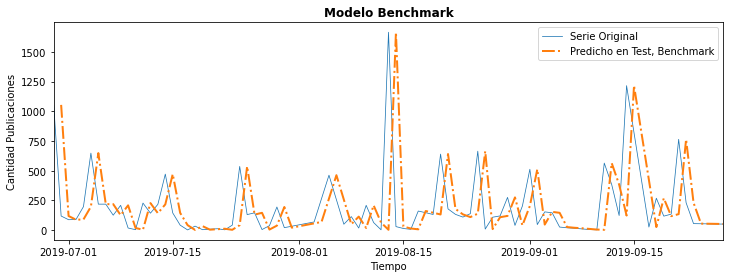

In [41]:
# Graficamos la serie original vs predicho
plt.figure(figsize=(12,4))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred_benchmark,'-.', lw = 2, label = 'Predicho en Test, Benchmark')
plt.xlim(diario.index[N_train+look_back-1], diario.index[length_total-1])
plt.title ('Modelo Benchmark', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Cantidad Publicaciones')
plt.legend()
plt.show()

Al visualizar el grafico podemos decir que si bien se respeta el patron de comportamiento, el mismo esta defasado, esto podria estar relacionado a un sobreajuste del modelo. A continuacion evaluaremos los errores asociados a la prediccion para tener mayor informacion.

In [42]:
# Evaluamos los errores de la prediccion
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_test_pred_benchmark)
print('Error en Test:',np.sqrt(MSE))

Error en Test: 369.64317629002403


In [50]:
df["cant_publicaciones"].mean()

269.6356164383562

Observando el valor de nuestra MSE y el promedio de publicaciones (269.63), podemos afirmar que el error es muy grande y que no predice los valores correctamente. Este nos indica que el error se encuentra por encima o por debajo de las 369 publicaciones, superando incluso la media.

**MODELO RANDOM FOREST**

In [51]:
# Importamos el error MSE y el modelo Random Forest
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Definimos nuestro modelo
rf = RandomForestRegressor(n_estimators=300, max_features="sqrt" , random_state=42, n_jobs =1 ,oob_score = True).fit(X_train,y_train)

In [52]:
# Definimos nuestra y de prediccion tanto es testeo como en entrenamiento
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [53]:
# Visualizamos el tamaño 
diario.index[N_train+look_back: length_total].shape

(90,)

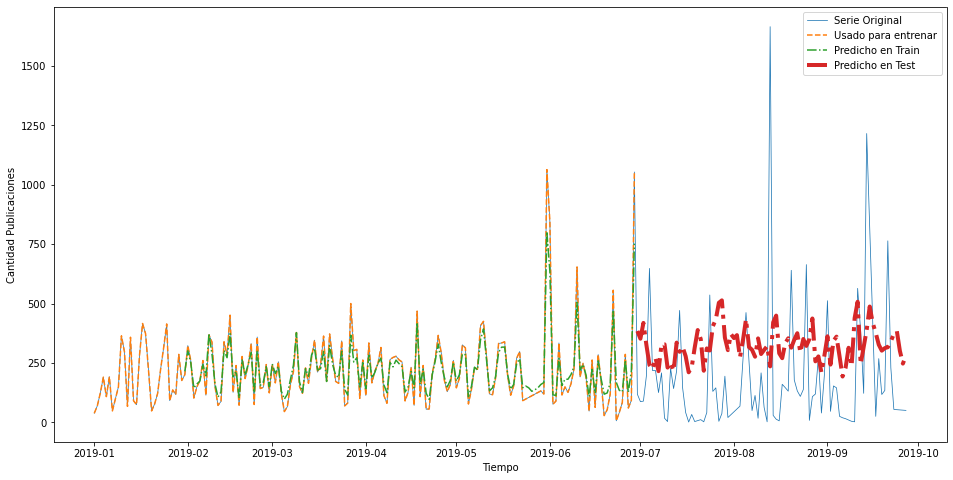

In [54]:
# Graficamos las predicciones realizadas por nuestro modelo
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[:N_train + look_back], diario[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad Publicaciones')
plt.show()

La linea roja punteada correponde a las predicciones realizadas por el modelo, al contrastarlo con la serie original (linea continua celeste) podemos ver grandes diferencias. 
A continuacion analizaremomos los errores asociados al modelo para obtener mayor informacion al respecto.

In [55]:
# Visualizamos errores asociados
MSE = mean_squared_error(y_train, y_train_pred)
print('Error en Train:',np.sqrt(MSE))

MSE = mean_squared_error(y_test, y_test_pred)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 56.7317748545933
Error en Test: 303.93240874974003


Existen diferencias significativas entre los errores de testeo y de entrenamiento. Enfocandonos en nuestro MSE de test, vemos que en comparacion al modelo Benchmark hubo una disminucion del mismo. A pesar de esta mejora, este continua siendo alto.

Raíz del error cuadrático medio en Train: 56.7317748545933
Raíz del error cuadrático medio en Test: 303.93240874974003


C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


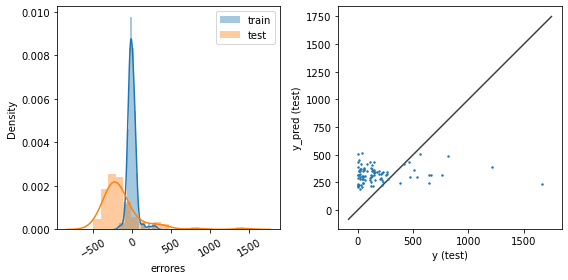

In [56]:
# Graficamos el MSE y su comparacion con los valores reales
from sklearn.metrics import mean_squared_error
import seaborn as sns

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
plt.figure(figsize = (8,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.xticks (rotation=30)
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.xticks (rotation=0)
plt.ylabel('y_pred (test)')
    
plt.tight_layout()
plt.show()

Al observar los graficos del MSE 

**MODELO XGBOSST**

In [59]:
# Importamos nuestro modelo
import xgboost as xgb

In [63]:
# Importamos TimeSeriesSplit y GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

In [64]:
# Instanciamos el modelo y definimos nuestra grilla de parametros
model = xgb.XGBRegressor()
param_search = {'max_depth' : [3, 5]}

# Optimización de hiperparámetros

tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv,scoring='neg_mean_squared_error',
                        param_grid=param_search)
gsearch.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=3),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                    

In [65]:
# Predecimos utilizando la mejor combinacion de parametros obtenida con GridSearch
y_train_pred1 = gsearch.predict(X_train)
y_test_pred1 = gsearch.predict(X_test)

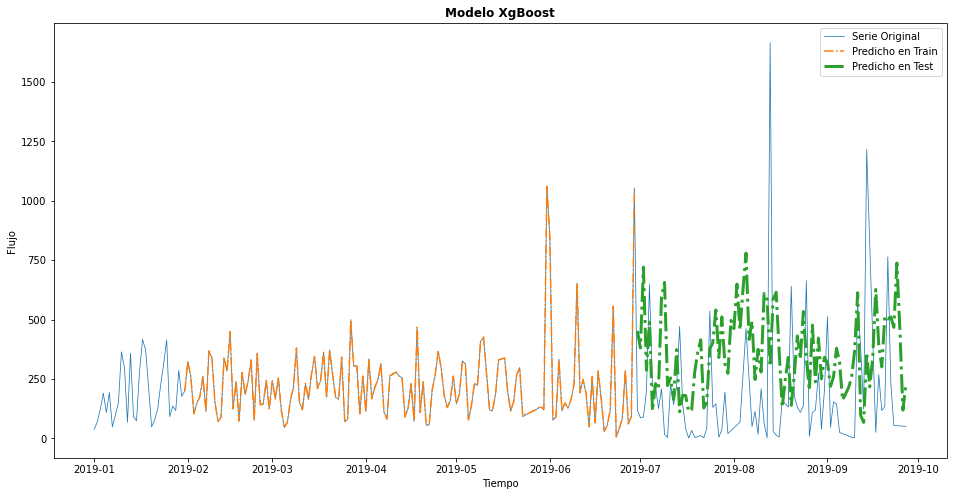

In [66]:
# Graficamos la serie original, lo predicho en train y en test
plt.figure(figsize=(16,8))
plt.plot(diario.index[:length_total], diario[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(diario.index[look_back: look_back + N_train], y_train_pred1,'-.',label = 'Predicho en Train')
plt.plot(diario.index[N_train+look_back: length_total], y_test_pred1,'-.', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.title ('Modelo XgBoost', fontweight = 'black')
plt.xlabel('Tiempo')
plt.ylabel('Flujo')
plt.show()

Mirando nuevamente nuestro grafico y teniendo en cuenta las predicciones realizadas por el modelo, continuamos teniendo diferencias con la serie original, es por eso que visualizaremos nuevamente los errores asociados para sacar mejores conclusiones.

In [67]:
# Error en Train
MSE = mean_squared_error(y_train, y_train_pred1)
print('Error en Train:',np.sqrt(MSE))

# Error en Test
MSE = mean_squared_error(y_test, y_test_pred1)
print('Error en Test:',np.sqrt(MSE))

Error en Train: 1.9763740134853258
Error en Test: 358.12794078452765


Obetenemos nuevamente grandes diferencias entre los errores de testeo o entrenamiento, este segundo disminuye cada vez mas y podriamos asociarlo al sobreajute de nuestro modelo. En el caso del MSE de testeo este incremento en relacion a Random Forest.

**CONLCUSIONES FINALES**

    - Modelo Benchmark: Error en testeo: 369.64
    - Modelo Random Forest: Error en entrenamiento: 56.73
                            Error en testeo: 303.93
    - Modelo XGboost: Error en entrenamiendo: 1.97
                      Error en testeo: 358.12     
                      
Retomando con el objetivo principal del trabajo, lograr desarrollar un modelo que nos permitiera predecir la cantidad de publicaciones de la empresa Properati a lo largo del tiempo, podemos concluir que los resultados obtenidos no fueron los optimos. Se desarrollaron distintos modelos pero los errores asociados fueron muy grandes para tomar estas predicciones como fehacientes.

Una de las posibles mejoras seria tener en cuenta un rango de tiempo mas amplio para poder entrenar el modelo con una mayor cantidad de datos.